# Clasificación de Supernovas usando Random Forest
## usando los datos del extraidos del notebook SN_feature_extraction V2

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
inicio_ejecucion = time.time()

In [2]:
import pandas as pd
url_features_unbalanced='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features.csv'
features_unbalanced = pd.read_csv(url_features_unbalanced, index_col=None)
features_unbalanced

,oid,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,...,SPM_tau_fall_1,SPM_chi_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
0,ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,...,11.688865,0.007554,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
1,ZTF18aaaqexr,0.896138,1.0,0.191736,1.0,29.230770,0.000933,29.230770,0.000000,NaN,...,17.585404,0.281999,0.292699,-8.394148,9.801738,0.447687,8.599661,32.414717,NaN,SNIa
2,ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,...,24.821418,0.033287,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
3,ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,0.065053,0.940291,999.999953,...,22.204705,0.010855,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNIIn
4,ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,1.029866,0.001505,37.037036,...,14.225585,0.028317,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,90.909084,14.063289,142.857138,...,24.208459,0.077253,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
2064,ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,66.666664,7.263297,76.923075,...,10.058062,0.013802,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
2065,ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,...,19.974884,0.045213,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
2066,ZTF20abgfljj,1.344170,1.0,2.227105,1.0,1.024148,0.016781,499.999976,498.975828,999.999953,...,4.324015,1.353607,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


In [3]:
banned_features=[]
for column in features_unbalanced.columns:
    if features_unbalanced[column].isna().sum()>200:
        print(column,features_unbalanced[column].isna().sum())
        banned_features.append(column)

Period_band_1 339
delta_period_1 339
Amplitude_1 339
AndersonDarling_1 339
Autocor_length_1 339
Beyond1Std_1 339
Con_1 339
Gskew_1 342
Meanvariance_1 339
MedianAbsDev_1 339
MedianBRP_1 339
PairSlopeTrend_1 339
PercentAmplitude_1 339
Q31_1 339
Rcs_1 339
Skew_1 339
SmallKurtosis_1 339
Std_1 339
StetsonK_1 339
Pvar_1 339
ExcessVar_1 339
SF_ML_amplitude_1 339
SF_ML_gamma_1 339
IAR_phi_1 339
LinearTrend_1 339
SPM_chi_1 378


In [4]:
features_unbalanced_2 = features_unbalanced.drop(banned_features, axis=1)
features_unbalanced_2 

,oid,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_2,delta_period_2,MHPS_ratio_1,...,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
0,ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.069774,51.560655,24.510580,...,2.329822,11.688865,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
1,ZTF18aaaqexr,0.896138,1.0,0.191736,1.0,29.230770,0.000933,NaN,NaN,0.216739,...,1.205330,17.585404,0.292699,-8.394148,9.801738,0.447687,8.599661,32.414717,NaN,SNIa
2,ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.185710,0.029147,0.752135,...,3.344742,24.821418,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
3,ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,999.999953,998.994608,337.794556,...,2.939173,22.204705,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNIIn
4,ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,37.037036,36.008675,0.751511,...,3.554814,14.225585,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,142.857138,37.884766,191.005722,...,3.176701,24.208459,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
2064,ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,76.923075,2.993114,112.711197,...,6.300816,10.058062,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
2065,ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,3.911379,...,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
2066,ZTF20abgfljj,1.344170,1.0,2.227105,1.0,1.024148,0.016781,999.999953,998.975804,0.362718,...,21.405151,4.324015,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


# EL valor del thresh es la cota de valores que se necesitan no nulos para que la fila no sea eliminada

In [5]:
thresh = features_unbalanced_2.shape[1]-1
thresh

93

In [6]:
features_unbalanced_2 = features_unbalanced_2.set_index('oid')

# Mantenga solo las filas con al menos 93 valores que no sean NA.

In [7]:
features_clean_unbalanced = features_unbalanced_2.dropna(thresh=thresh)
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_2,delta_period_2,MHPS_ratio_1,MHPS_low_1,...,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.069774,51.560655,24.510580,3.971278,...,2.329822,11.688865,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.185710,0.029147,0.752135,0.016245,...,3.344742,24.821418,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,999.999953,998.994608,337.794556,34.621597,...,2.939173,22.204705,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNIIn
ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,37.037036,36.008675,0.751511,0.199288,...,3.554814,14.225585,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
ZTF18aaermez,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.183438,0.066186,3.026673,0.060769,...,8.207399,21.426885,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,142.857138,37.884766,191.005722,13.320155,...,3.176701,24.208459,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,76.923075,2.993114,112.711197,14.528273,...,6.300816,10.058062,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,3.911379,0.107875,...,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa


In [8]:
#features_clean_unbalanced.to_csv("features_clean_unbalanced.csv")

In [9]:
count_clase1 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,SLSN,33
1,SNII,288
2,SNIIb,12
3,SNIIn,39
4,SNIa,1278
5,SNIbc,82


# Unión de las supernovas clase II
## Se unen las clases SNII,SNIIb,SNIIn	

In [10]:
features_clean_unbalanced['classALeRCE']= features_clean_unbalanced['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
features_clean_unbalanced

C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_2,delta_period_2,MHPS_ratio_1,MHPS_low_1,...,SPM_tau_rise_1,SPM_tau_fall_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.069774,51.560655,24.510580,3.971278,...,2.329822,11.688865,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.185710,0.029147,0.752135,0.016245,...,3.344742,24.821418,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056146,999.999953,998.994608,337.794556,34.621597,...,2.939173,22.204705,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNII
ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,37.037036,36.008675,0.751511,0.199288,...,3.554814,14.225585,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
ZTF18aaermez,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.183438,0.066186,3.026673,0.060769,...,8.207399,21.426885,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,142.857138,37.884766,191.005722,13.320155,...,3.176701,24.208459,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,76.923075,2.993114,112.711197,14.528273,...,6.300816,10.058062,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,3.911379,0.107875,...,3.415255,19.974884,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa


In [11]:
count_clase2 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase2 = count_clase2.groupby(count_clase2.columns.tolist(),as_index=False).size()
count_clase2

,classALeRCE,size
0,SLSN,33
1,SNII,339
2,SNIa,1278
3,SNIbc,82



# Separación del conjunto en ENTRENAMIENTO y TEST:

Dividiremos el conjunto en 70% para entrenamiento y 30% para test


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # se codifica la clase
le = LabelEncoder()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X, y = features_clean_unbalanced.iloc[:,:-1], features_clean_unbalanced['classALeRCE']
X = scaler.fit_transform(X)
# label encode the target variable
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify=y, random_state=42)



In [13]:
le.classes_

array(['SLSN', 'SNII', 'SNIa', 'SNIbc'], dtype=object)

In [14]:
count_clase0 = pd.DataFrame({'y_train':y_train})
count_clase0 = count_clase0.groupby(count_clase0.columns.tolist(),as_index=False).size()
count_clase0 

,y_train,size
0,0,23
1,1,237
2,2,894
3,3,58


In [15]:
count_clase = pd.DataFrame({'y_test':y_test})
count_clase = count_clase.groupby(count_clase.columns.tolist(),as_index=False).size()
count_clase 

,y_test,size
0,0,10
1,1,102
2,2,384
3,3,24


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
classifier_0 = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=30,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced'
)
classifier_0.fit(X_train,y_train)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_0 = classifier_0.predict(X_test)

In [18]:
# calculate accuracy
from sklearn import metrics
accuracy_0= metrics.balanced_accuracy_score(y_test, pred_labels_0)*100
presicion_0 = metrics.precision_score(y_test, pred_labels_0,average='macro')*100
recall_0 = metrics.recall_score(y_test, pred_labels_0,average='macro')*100
print("Classification accuracy is %2f"%accuracy_0,"%")
print("Classification precision is %2f"%presicion_0,"%")
print("Classification recall is %2f"%recall_0,"%")

Classification accuracy is 43.840380 %
Classification precision is 67.719228 %
Classification recall is 43.840380 %


C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
y_sin_codificar = le.inverse_transform(y)
np.unique(y),np.unique(y_sin_codificar)
df = pd.DataFrame()
df['ClassALeRCE']=np.unique(y_sin_codificar)
df['Codificación']=np.unique(y)
df

,ClassALeRCE,Codificación
0,SLSN,0
1,SNII,1
2,SNIa,2
3,SNIbc,3


In [20]:
count_clase3 = pd.DataFrame({'y_train':y_train})
count_clase3 = count_clase3.groupby(count_clase3.columns.tolist(),as_index=False).size()
count_clase3 

,y_train,size
0,0,23
1,1,237
2,2,894
3,3,58


In [21]:
count_clase3['size'][0],count_clase3['size'][1],count_clase3['size'][2],count_clase3['size'][3]


(23, 237, 894, 58)

# Balancear los datos: Oversampling the minority class
Ojo que solo balanceamos los datos de Train

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # se codifica la clase

# transform the dataset
# clase 0 : SLSN, clase 1: SNII, clase 2: SNIa,clase 3 = SNIbc
oversample = SMOTE(sampling_strategy = {0: count_clase3['size'][0]*10, 1: count_clase3['size'][1]*2, 2: count_clase3['size'][2]*1, 3: count_clase3['size'][3]*6})
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#X_train_smote = scaler.fit_transform(X_train_smote)

In [23]:
le.classes_

array(['SLSN', 'SNII', 'SNIa', 'SNIbc'], dtype=object)

In [24]:
count_clase5 = pd.DataFrame({'classALeRCE': y_train_smote})
count_clase5 = count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()
count_clase5

,classALeRCE,size
0,0,230
1,1,474
2,2,894
3,3,348


Text(0, 0.5, 'Muestras')

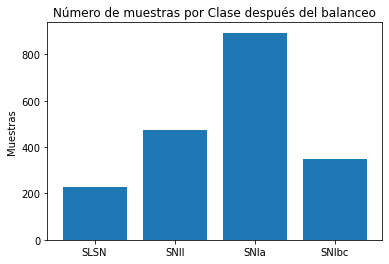

In [25]:
import matplotlib.pyplot as plt
plt.bar(np.unique(y_sin_codificar),count_clase5['size'].values)
plt.title('Número de muestras por Clase después del balanceo')
plt.ylabel('Muestras')

Text(0, 0.5, 'Muestras')

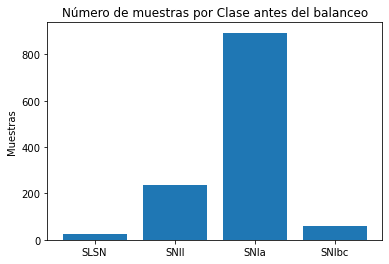

In [26]:
plt.bar(np.unique(y_sin_codificar),count_clase3 ['size'].values)
plt.title('Número de muestras por Clase antes del balanceo')
plt.ylabel('Muestras')

In [27]:
classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=100,
    max_features= 'auto',
    min_samples_leaf=1,
    min_samples_split= 5,
    bootstrap=False,
    class_weight='balanced')
#-----------------------ENTRENAMIENTO-----------------------------------------
classifier.fit(X_train_smote,y_train_smote)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels = classifier.predict(X_test)

In [28]:
# calculate accuracy
from sklearn import metrics
#accuracy= metrics.accuracy_score(y_test, pred_labels)*100

accuracy= metrics.balanced_accuracy_score(y_test, pred_labels)*100
presicion= metrics.precision_score(y_test, pred_labels,average='macro')*100
recall = metrics.recall_score(y_test, pred_labels,average='macro')*100
print("Classification accuracy is %2f"%accuracy,"%")
print("Classification precision is %2f"%presicion,"%")
print("Classification recall is %2f"%recall,"%")

Classification accuracy is 50.380668 %
Classification precision is 92.980002 %
Classification recall is 50.380668 %


In [29]:
np.unique(y_sin_codificar)

array(['SLSN', 'SNII', 'SNIa', 'SNIbc'], dtype=object)

Text(609.9818181818181, 0.5, 'True Label')

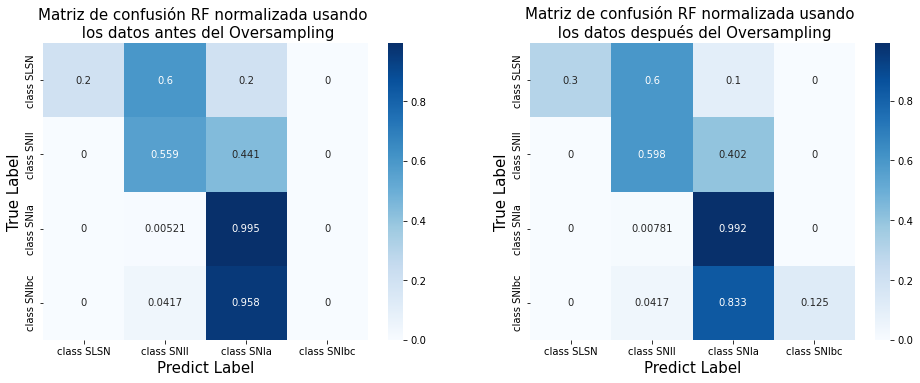

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
columns = ['class %s' %(i) for i in le.classes_]


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)

confm_1 = confusion_matrix(y_test, pred_labels_0,normalize='true')
df_cm_1 = pd.DataFrame(confm_1, index=columns, columns=columns)
ax_1 = sn.heatmap(df_cm_1, cmap='Blues',fmt='.3g', ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_1.set_title('Matriz de confusión RF normalizada usando \n los datos antes del Oversampling',fontsize=15)
ax_1.set_xlabel('Predict Label',fontsize=15)
ax_1.set_ylabel('True Label',fontsize=15)

ax = fig.add_subplot(2, 2, 2)
confm_2 = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm_2 = pd.DataFrame(confm_2, index=columns, columns=columns)
ax_2 = sn.heatmap(df_cm_2, cmap='Blues',fmt='.3g',ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_2.set_title('Matriz de confusión RF normalizada usando \n los datos después del Oversampling',fontsize=15)
ax_2.set_xlabel('Predict Label',fontsize=15)
ax_2.set_ylabel('True Label',fontsize=15)

In [31]:
fin = time.time()

In [32]:
tiempo_de_extraccion = (fin-inicio_ejecucion)/60
print(f'La clasificación se demoro {"{:.2f}".format(tiempo_de_extraccion)} minutos')

La clasificación se demoro 0.07 minutos


## Random Forest Hyperparameter tuning

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(20,300,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
class_weight=['balanced',None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}
print(random_grid)

{'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': ['balanced', None]}


In [34]:
"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = None)
# Fit the random search model
rf_random.fit(X_train_smote, y_train_smote)
"""

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; to

[CV] END bootstrap=False, class_weight=None, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   2.1s
[CV] END bootstrap=False, class_weight=None, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   2.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=10, max_feat

[CV] END bootstrap=False, class_weight=None, max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=   1.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=91, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=91, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=91, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=140; total time=   0.6s
[CV] END bootstrap=False, class_weight=None, max_depth=73, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210; total time=   1.4s
[CV] END bootstrap=False, class_weight=None, max_depth=73, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=210; total time=   1.4s
[CV] END bootstrap=False, class_weight=None, max_depth=

[CV] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END bootstrap=True, class_wei

[CV] END bootstrap=True, class_weight=None, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, class_weight=None, max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, class_weight=None, max_depth=37, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, class_weight=None, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=140; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, max_depth=46, max_features=

[CV] END bootstrap=False, class_weight=None, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=170; total time=   1.0s
[CV] END bootstrap=False, class_weight=None, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=170; total time=   1.0s
[CV] END bootstrap=False, class_weight=None, max_depth=37, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=170; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=190; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=190; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced, max_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [20, 30, 40, 50, 60, 70,
                                                         80, 90, 100, 110, 120,
                                                         130, 140, 150, 160,
                                                         170, 180, 190, 200,
                                 

In [35]:
"""
{'n_estimators': 240,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}
 
 {'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 46,
 'class_weight': 'balanced',
 'bootstrap': False}

rf_random.best_params_
"""

{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 46,
 'class_weight': 'balanced',
 'bootstrap': False}

In [36]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [30, 50, 90, 100],
    'max_features': [2, 3,5,10,15,20,25,30],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [2,8, 10, 12],
    'n_estimators': [30,50,60,100, 200, 240]
}
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs=None, verbose = 2)

In [37]:
# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)
grid_search.best_params_


Fitting 3 folds for each of 6144 candidates, totalling 18432 fits
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV

[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=2, 

[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_

[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=2, mi

[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=2, min_sa

[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_sample

[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samp

[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_

[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=3,

[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_sa

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=5,

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_sa

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samp

[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=5, min_sample

[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, mi

[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_featur

[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=10

[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_featu

[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=10

[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=15, min

[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, max_features=15

[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_s

[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=30, max_featur

[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.4s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_feature

[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=2

[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   3.2s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=20

[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_

[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=20, m

[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.4s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.4s
[CV] END bootstrap=False, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features

[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=25

[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   4.1s
[CV] END bootstrap=False, max_depth=30, max_feat

[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   4.2s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   4.4s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=25

[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=25, mi

[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   5.0s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   5.2s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   5.6s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=30,

[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_s

[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   4.2s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   4.1s
[CV] END bootstrap=False, max_depth=30, max_featu

[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   4.7s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   4.8s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   4.9s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features

[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=30, max_features=

[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_sa

[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_l

[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_sa

[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_l

[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=2,

[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_sa

[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=3,

[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_sa

[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=3, min_sam

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_sampl

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_s

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_

[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=5, 

[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10

[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=10,

[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.8s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.8s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=10, mi

[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=10, min

[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   2.0s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=False, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=False, max_depth=50, max_feat

[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=15

[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, max_featur

[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   2.7s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=15

[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=15, min_

[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   4.0s
[CV] END bootstrap=False, max_depth=50, max_features=20

[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min

[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=50, max_feature

[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   3.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   3.4s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_featur

[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=20

[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   3.9s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   4.6s
[CV] END bootstrap=False, max_depth=50, max_features=25

[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   5.0s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   5.1s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=25, min

[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   1.5s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=50, max_features=25, mi

[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   4.3s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   4.4s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   4.4s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_featur

[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=25

[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.0s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.1s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.0s
[CV] END bootstrap=False, max_depth=50, max_featu

[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   5.8s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   6.6s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   5.9s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=30

[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, max_depth=50, max_features=30, min

[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   5.4s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   5.7s
[CV] END bootstrap=False, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   5.5s
[CV] END bootstrap=False, max_depth=50, max_features=30

[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_l

[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=2,

[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_sa

[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=2,

[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=2, min_sa

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_sa

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samp

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=3, min

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, m

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_s

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_sa

[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=5, min_samples_l

[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=10

[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   2.3s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=10, m

[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features

[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   2.0s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_featu

[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=10

[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=90, max_features=15,

[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=15, mi

[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min

[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   2.9s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_feat

[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=15

[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, max_depth=90, max_featur

[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   3.3s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   3.2s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   3.3s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=20

[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_

[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=20

[CV] END bootstrap=False, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=25, min

[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=90, max_feature

[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   3.8s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   3.9s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   4.0s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_featur

[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=25

[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   3.6s
[CV] END bootstrap=False, max_depth=90, max_features=25

[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   4.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   4.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min

[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, mi

[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   4.5s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   4.6s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   4.7s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_featur

[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=30

[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   3.7s
[CV] END bootstrap=False, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   3.7s
[CV] END bootstrap=False, max_depth=90, max_featu

[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2

[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=2, min

[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=2

[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_s

[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features

[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_featur

[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=3

[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=3, min_s

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=5

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=5, m

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_feature

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_feat

[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=5

[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=100, max_feat

[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   1.8s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_feature

[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features

[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   1.6s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   1.6s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, 

[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, ma

[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   2.4s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   2.4s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   2.5s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=

[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features

[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=100, max

[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   3.1s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   3.1s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   3.2s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, ma

[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   3.0s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   4.1s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   4.2s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features

[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_feature

[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   3.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   4.0s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   4.0s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   4.1s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, ma

[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   1.1s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   2.8s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   4.1s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   7.3s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   7.2s
[CV] END bootstrap=False, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   5.8s
[CV] END bootstrap=False, max_depth=100, m

[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=  10.4s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=  10.5s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=  10.6s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   1.6s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   2.2s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   1.9s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.4s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.1s
[CV] END bootstrap=False, max_depth=100, max_features

[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   8.5s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   8.0s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   8.7s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   9.5s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=  12.6s
[CV] END bootstrap=False, max_depth=100, max_fea

[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   1.3s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   1.1s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   2.1s
[CV] END bootstrap=False, max_depth=100, max_features=3

[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   3.5s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   2.9s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   4.6s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   9.7s
[CV] END bootstrap=False, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   7.6s
[CV] END bootstrap=False, max_depth=100, ma

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, 

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, m

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_l

[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=3, min_sampl

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=3

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, 

[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.4s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.5s
[CV] END bootstrap=True, max_depth=30, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=10,

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=10, min_samp

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_sample

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_sample

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=15, min

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_s

[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=15,

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samp

[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_sam

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=25, min

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, m

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_s

[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_l

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_sa

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   3.8s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=30, m

[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.9s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=30, min

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4,

[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=2, min_samples_lea

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, m

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=3, m

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, m

[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=5, min_sam

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=10,

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=10, min_samp

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_sample

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_sample

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=15, min

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_s

[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=15,

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samp

[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_sam

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=25, min

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=25, m

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_s

[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_l

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.9s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_sa

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, m

[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=30, min

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2,

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sampl

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, m

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_le

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5,

[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=10, mi

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=10, min_samples

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_l

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=15,

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=15,

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=25, min

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_s

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.3s
[CV] END bootstrap=True, max_depth=90, max_features=25,

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.3s
[CV] END bootstrap=True, max_depth=90, max_features=25, min_sa

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=240; total time=   3.0s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   2.8s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   2.8s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=240; total time=   2.8s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min

[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=10, n_estimators=240; total time=   2.7s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=30, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=30, m

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_l

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_l

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=2, min_samples_split=8, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_l

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=2, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples

[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=5, 

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=2, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=4, min_samples_split=8, n_estimators=240; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=10

[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_samples_leaf=5, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=10, min_s

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=15,

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=2, min_samples_split=12, n_estimators=240; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15,

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=4, min_samples_split=10, n_estimators=240; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_feat

[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=15

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=20,

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=2, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, mi

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=4, min_samples_split=12, n_estimators=240; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_feat

[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=20, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=20

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_featur

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   2.3s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=8, n_estimators=240; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=3, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=25

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=2, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=25

[CV] END bootstrap=True, max_depth=100, max_features=25, min_samples_leaf=5, min_samples_split=12, n_estimators=240; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min

[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=2, min_samples_split=12, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_feature

[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.7s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.7s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=10, n_estimators=240; total time=   2.8s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_featur

[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=30

[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=30, min_samples_leaf=5, min_samples_split=8, n_estimators=240; total time=   2.6s
[CV] END bootstrap=True, max_depth=100, max_features=30

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
from datetime import datetime
datetime.now()

datetime.datetime(2021, 11, 26, 16, 32, 38, 434898)

# Pruebas con los mejores hiperparametros encontrados

In [39]:

best_grid = grid_search.best_estimator_
best_grid


RandomForestClassifier(bootstrap=False, max_depth=100, max_features=10,
                       min_samples_leaf=2)

## Mejor usando grid search

{'n_estimators': 240,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}

In [40]:
#    class_weight='balanced'
best_classifier_1 = RandomForestClassifier(
    n_estimators=240,
    max_depth=None,
    max_features= 'auto',
    min_samples_leaf=2,
    min_samples_split= 2,
    bootstrap=False
)
best_classifier_1.fit(X_train_smote,y_train_smote)
#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_1 = best_classifier_1.predict(X_test)


In [41]:
# calculate accuracy
from sklearn import metrics
accuracy_1 = metrics.balanced_accuracy_score(y_test, pred_labels_1)*100
presicion_1 = metrics.precision_score(y_test, pred_labels_1,average='macro')*100
recall_1 = metrics.recall_score(y_test, pred_labels_1,average='macro')*100
print("Classification accuracy is %2f"%accuracy_1,"%")
print("Classification precision is %2f"%presicion_1,"%")
print("Classification recall is %2f"%recall_1,"%")

Classification accuracy is 52.027420 %
Classification precision is 81.814985 %
Classification recall is 52.027420 %


## Classification accuracy is 87.53%

## Mejor usando RandomizedSearchCV
 {'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 46,
 'class_weight': 'balanced',
 'bootstrap': False}

In [42]:
#    class_weight='balanced'
best_classifier_2 = RandomForestClassifier(
    n_estimators=160,
    max_depth=46,
    max_features= 'auto',
    min_samples_leaf=2,
    min_samples_split= 2,
    bootstrap=False,
    class_weight= 'balanced'
)
best_classifier_2.fit(X_train_smote,y_train_smote)

#------------------SE PRUEBA EL CLASIFICADOR----------------------------------
# predict new data:
#pues solo usaremos el target para comprobar la eficacia de la predicción

pred_labels_2 = best_classifier_2.predict(X_test)

In [43]:
# calculate accuracy
from sklearn import metrics
#accuracy_2 = metrics.accuracy_score(y_test, pred_labels_2)*100

accuracy_2 = metrics.balanced_accuracy_score(y_test, pred_labels_2)*100
presicion_2 = metrics.precision_score(y_test, pred_labels_2,average='macro')*100
recall_2 = metrics.recall_score(y_test, pred_labels_2,average='macro')*100
print("Classification accuracy is %2f"%accuracy_2,"%")
print("Classification precision is %2f"%presicion_2,"%")
print("Classification recall is %2f"%recall_2,"%")

Classification accuracy is 49.944087 %
Classification precision is 84.583144 %
Classification recall is 49.944087 %


Text(609.9818181818181, 0.5, 'True Label')

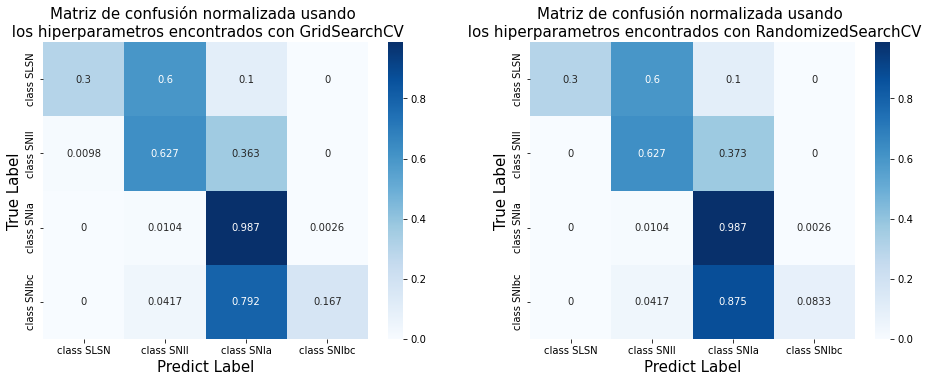

In [44]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)

confm_1 = confusion_matrix(y_test, pred_labels_1,normalize='true')
df_cm_1 = pd.DataFrame(confm_1, index=columns, columns=columns)
ax_1 = sn.heatmap(df_cm_1, cmap='Blues',fmt='.3g', ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_1.set_title('Matriz de confusión normalizada usando \n los hiperparametros encontrados con GridSearchCV',fontsize=15)
ax_1.set_xlabel('Predict Label',fontsize=15)
ax_1.set_ylabel('True Label',fontsize=15)

ax = fig.add_subplot(2, 2, 2)
confm_2 = confusion_matrix(y_test, pred_labels_2,normalize='true')
df_cm_2 = pd.DataFrame(confm_2, index=columns, columns=columns)
ax_2 = sn.heatmap(df_cm_2, cmap='Blues',fmt='.3g',ax=ax, annot=True)
#sn.set(rc={'figure.figsize':(16,12)})
ax_2.set_title('Matriz de confusión normalizada usando \n los hiperparametros encontrados con RandomizedSearchCV',fontsize=15)
ax_2.set_xlabel('Predict Label',fontsize=15)
ax_2.set_ylabel('True Label',fontsize=15)

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [45]:
if accuracy_2>accuracy_1:
    print("El mejor modelo es el que utiliza los hiperparametros encontrandos usando RandomizedSearchCV")
    print("""{'n_estimators': 100,\n 'min_samples_split': 2,\n 'min_samples_leaf': 1,\n 'max_features': 'auto',\n 'max_depth': 100,\n 'bootstrap': False}""")
    best_classifier = best_classifier_2
    pred_labels=pred_labels_2
else:
    print("El mejor modelo es el que utiliza los hiperparametros encontrandos usando GridSearch")
    print("""{'bootstrap': True,
 'max_depth': 100,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}""")
    best_classifier = best_classifier_1
    pred_labels=pred_labels_1

El mejor modelo es el que utiliza los hiperparametros encontrandos usando GridSearch
{'bootstrap': True,
 'max_depth': 100,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}


## Classification accuracy is 88.52%

Text(33.0, 0.5, 'True Label')

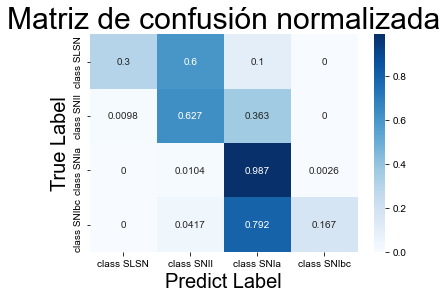

In [46]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

# Importancia de las caracteristicas

In [47]:
import matplotlib.pyplot as plt
importance = best_classifier.feature_importances_

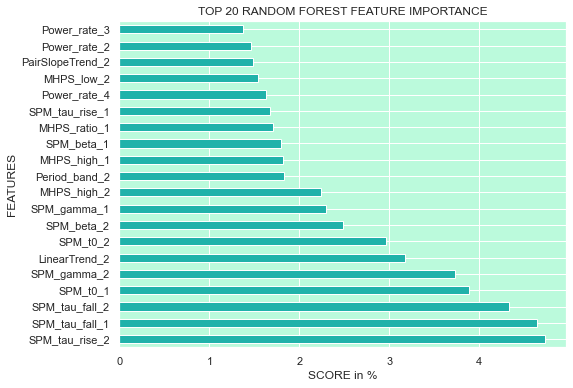

In [48]:
ranking = 20

#plot graph of feature importances for better visualization
fig, ax = plt.subplots(1,figsize=(8, 6))

feat_importances = pd.Series(importance*100, index=features_clean_unbalanced.columns[0:-1])
feat_importances.nlargest(ranking).plot(kind='barh', color='lightseagreen')
title = f"TOP {ranking} RANDOM FOREST FEATURE IMPORTANCE"
plt.title(title)
plt.xlabel("SCORE in %")
plt.ylabel("FEATURES")
ax.set_facecolor('#bbfadc')
plt.show()

## Con el siguiente codigo se puede guardar el mejor modelo para utilizarlo en otra ocasión

In [49]:
import pickle
# save the model to disk
filename = 'Bests_models/best_classifier_RF_3.sav'
pickle.dump(best_classifier, open(filename, 'wb'))

In [50]:
 # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8653846153846154


# El mejor modelo guardado hasta ahora: 

In [51]:
 # load the model from disk
#best_classifier_RF = pickle.load(open('Bests_models/best_classifier_RF.sav', 'rb'))
#result = best_classifier_RF.score(X_test, y_test)
#print(result)

In [52]:
#best_pred_labels = best_classifier_RF.predict(X_test)

In [53]:
# Confusion Matrix del mejor modelo
"""
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, best_pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)
"""

"\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sn\n\ncolumns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]\n\nconfm = confusion_matrix(y_test, best_pred_labels,normalize='true')\ndf_cm = pd.DataFrame(confm, index=columns, columns=columns)\nax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)\nsn.set(rc={'figure.figsize':(12,8)})\nax.set_title('Matriz de confusión normalizada',fontsize=30)\nax.set_xlabel('Predict Label',fontsize=20)\nax.set_ylabel('True Label',fontsize=20)\n"